<a href="https://colab.research.google.com/github/kireysakura/project.data/blob/main/knn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#cek missing value
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# replace fitur data yang banyak 0 menjadi nan
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_missing] = data[cols_missing].replace(0, np.nan)

print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# imputasi missing value menggunakan mean
for col in cols_missing:
    data[col].fillna(data[col].mean(), inplace=True)
data = data.round(2)  # bulatkan 2 angka di belakang koma
print(data[cols_missing].head(10))

   Glucose  BloodPressure  SkinThickness  Insulin    BMI
0    148.0          72.00          35.00   155.55  33.60
1     85.0          66.00          29.00   155.55  26.60
2    183.0          64.00          29.15   155.55  23.30
3     89.0          66.00          23.00    94.00  28.10
4    137.0          40.00          35.00   168.00  43.10
5    116.0          74.00          29.15   155.55  25.60
6     78.0          50.00          32.00    88.00  31.00
7    115.0          72.41          29.15   155.55  35.30
8    197.0          70.00          45.00   543.00  30.50
9    125.0          96.00          29.15   155.55  32.46


/tmp/ipython-input-3366615960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
# handle duplikasi data
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")
data.drop_duplicates(inplace=True)
num_duplicates_after_dropping = data.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after_dropping}")

Number of duplicate rows found: 0
Number of duplicate rows after removal: 0


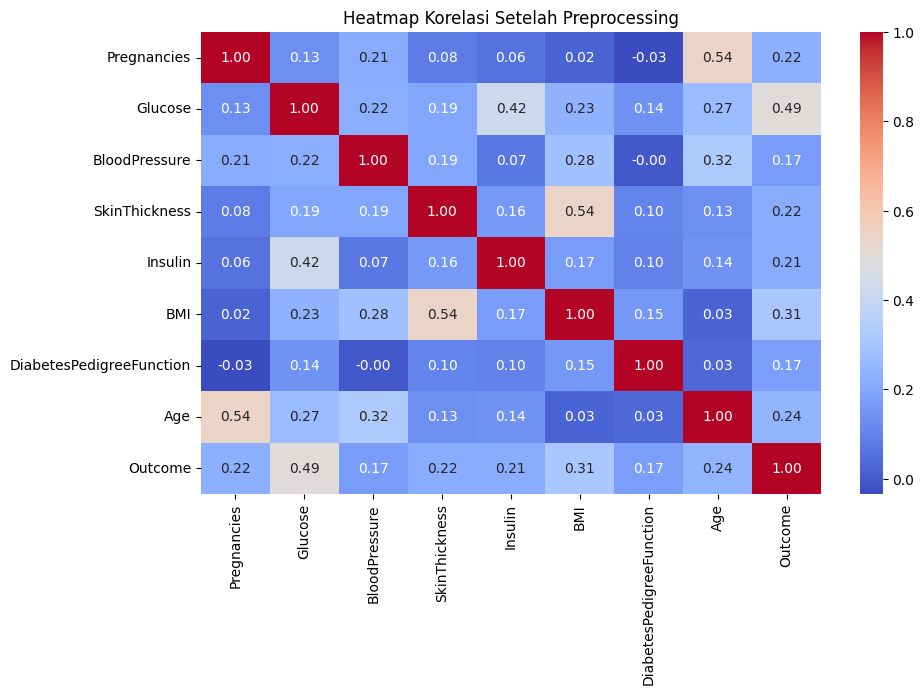

3 Fitur dengan Korelasi Tertinggi terhadap Outcome:
Glucose    0.492928
BMI        0.311923
Age        0.238356
Name: Outcome, dtype: float64


In [ ]:
# Hitung korelasi antar kolom
corr = data.corr()

# Visualisasikan korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Setelah Preprocessing")
plt.show()

# Tampilkan 3 fitur dengan korelasi tertinggi terhadap Outcome
top_corr = corr["Outcome"].drop("Outcome").sort_values(ascending=False).head(3)
print("3 Fitur dengan Korelasi Tertinggi terhadap Outcome:")
print(top_corr)

In [ ]:
x = data.iloc[:, [1, 5, 7]].values
y = data.iloc[:, -1].values
print(x)
print(y)

[[148.   33.6  50. ]
 [ 85.   26.6  31. ]
 [183.   23.3  32. ]
 ...
 [121.   26.2  30. ]
 [126.   30.1  47. ]
 [ 93.   30.4  23. ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 

In [ ]:
#Membagi Dataset ke Data Training dan Data Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
print(x_train)

[[151.    42.1   21.  ]
 [ 83.    18.2   27.  ]
 [122.    36.8   27.  ]
 ...
 [ 94.    24.7   21.  ]
 [ 85.    30.1   35.  ]
 [136.    32.46  69.  ]]


In [ ]:
len(x_train)

537

In [ ]:
len(x)

768

In [ ]:
len(x_test)

231

In [ ]:
print(y_train)

[1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 1 

In [ ]:
len(y_train)

537

In [ ]:
len(y_test)

231

In [ ]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 0.93781177  1.34143654 -1.05654479]
 [-1.29587153 -2.08333578 -0.55622332]
 [-0.01478846  0.5819682  -0.55622332]
 ...
 [-0.9345404  -1.15191235 -1.05654479]
 [-1.23017496 -0.37811442  0.11087198]
 [ 0.44508752 -0.03993606  2.94602702]]
[[ 2.5145294   1.45607327 -0.97315788]
 [-0.50751271  0.12342128 -0.88977097]
 [-1.52580951  0.18073964 -0.72299714]
 [ 1.43053603 -0.99428684  1.44506259]
 [-0.37611958 -1.16624194 -0.22267567]
 [-1.36156809 -0.87965011 -0.80638406]
 [ 0.97066006  0.20939882 -0.05590184]
 [ 1.75901887  0.0804325   1.5284495 ]
 [ 0.14945296 -0.72202461 -0.72299714]
 [-0.63890585  0.71093452  1.77861024]
 [ 1.16774976 -0.16317055 -0.4728364 ]
 [ 2.12034999  1.5563804   1.61183641]
 [-0.27757473 -1.12325316  1.94538407]
 [-1.32871981 -0.60738788 -0.72299714]
 [-1.88714063 -0.10585218  0.69458037]
 [-0.47466443 -0.77934297 -0.13928875]
 [ 1.85756372 -0.00554504  0.1942589 ]
 [-1.62435436 -1.3955154  -1.05654479]
 [ 0.31369438 -0.67903583  2.44570554]
 [-0.77029898  0.18

In [ ]:
#Memanggil Function KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Menentukan Prediksi
y_pred = classifier.predict(x_test)

In [ ]:
#Evaluasi dan Validasi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[138  19]
 [ 30  44]]


In [ ]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.70      0.59      0.64        74

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :78 persen


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Fitur & label
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Terapkan SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("Sebelum SMOTE:", np.bincount(y))
print("Setelah SMOTE:", np.bincount(y_res))

# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cari K terbaik
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_res, y_res, cv=kf)
    accuracies.append(scores.mean())

best_k = k_values[np.argmax(accuracies)]

print("K terbaik:", best_k)
print("Akurasi terbaik:", max(accuracies))


Sebelum SMOTE: [500 268]
Setelah SMOTE: [500 500]
K terbaik: 1
Akurasi terbaik: 0.8139999999999998
